In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.stats import norm, expon, gamma, beta, exponnorm

## **1. Basado en datos tomados en campo, se conoce que el tiempo de fallo de una bomba es distribuido normalmente. El promedio y desviación estandar del tiempo de fallo son estimados a partir de la data historica en 3200 y 600 horas, respectivamente. Calcular la probabilidad de que la bomba falle despues de haber trabajado 2000 horas. Un sistema esta compuesto por dos bombas que trabajan en paralelo, el sistema falla si al menos una bomba esta funcional. Calcular la probabilidad de que el sistema falle despues de 2000 horas.**

In [5]:
df.head()

,id,ttf,s12,s14,s17
0,1,191,521.66,8138.62,392
1,1,190,522.28,8131.49,392
2,1,189,522.42,8133.23,390
3,1,188,522.86,8133.83,392
4,1,187,522.19,8133.80,393


In [6]:
1 - norm.cdf(x=2000, loc=3200, scale=600)

0.9772498680518208

In [ ]:
# probabilidad de que las dos bombas fallen luego de trabajar 2000 horas
1 - norm.cdf(x=2000, loc=3200, scale=600) - norm.cdf(x=2000, loc=3200, scale=600)

In [ ]:
# literal c: probabilidad de que el sistema falle dado que se necesita que las dos bombas fallen
# P(A|B) = P(A and B) / P(B)
# P(A and B) = P(B|A) * P(A)
# P(A) = P(ambas bombas fallen) = P(B1) * P(B2)
# P(B) = P(que fallen las dos bombas) = P(A)
# P(B|A) = P(que fallen las dos bombas dado que el sistema falla) = 1
(1 - norm.cdf(x=2000, loc=3200, scale=600) - norm.cdf(x=2000, loc=3200, scale=600)) / (1 - norm.cdf(x=2000, loc=3200, scale=600))

## **2. Considerar el dataset "3_2_dataset.csv, el cual tiene registros historicos de tiempos de fallo en horas ("ttf") luego de haber realizado 100 pruebas con el mismo modelo de motor utilizandolo una y otra vez hasta quedar fuera de servicio. Calcular la probabilidad de que el motor falle antes de 125 horas. En caso de tener dos motores funcionando en paralelo, calcule la probabilidad que los dos fallen pasado las 200 horas.**

In [7]:
df = pd.read_csv('./3_2_dataset.csv')

In [8]:
df.head()

,id,ttf,s12,s14,s17
0,1,191,521.66,8138.62,392
1,1,190,522.28,8131.49,392
2,1,189,522.42,8133.23,390
3,1,188,522.86,8133.83,392
4,1,187,522.19,8133.80,393


In [9]:
df_target = df['ttf']
df_target.describe()

count    20631.000000
mean       107.807862
std         68.880990
min          0.000000
25%         51.000000
50%        103.000000
75%        155.000000
max        361.000000
Name: ttf, dtype: float64

<Axes: xlabel='ttf', ylabel='Density'>

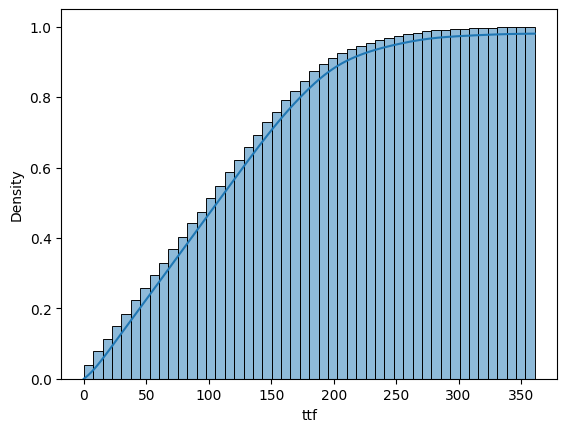

In [11]:
sns.histplot(df_target, stat='density', cumulative=True, kde=True)

[None]

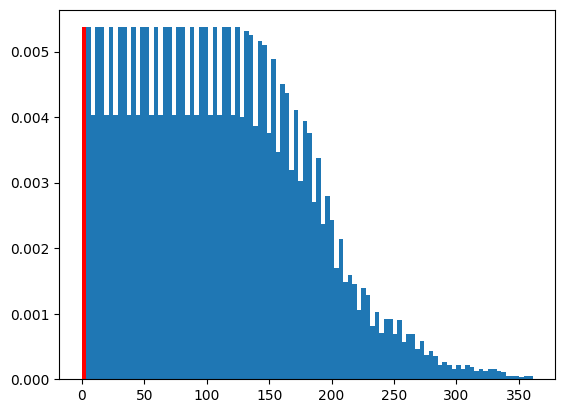

In [16]:
n, bins, patches = plt.hist(df_target, bins=100, density=True)
# n es la frecuencia de cada bin
# bins es el valor de cada bin
# patches es una lista de los objetos que representan cada barra del histograma
# con ello podemos modificar el color de cada barra


In [14]:
n

array([5.37071999e-03, 5.37071999e-03, 4.02803999e-03, 5.37071999e-03,
       5.37071999e-03, 4.02803999e-03, 5.37071999e-03, 4.02803999e-03,
       5.37071999e-03, 5.37071999e-03, 4.02803999e-03, 5.37071999e-03,
       4.02803999e-03, 5.37071999e-03, 5.37071999e-03, 4.02803999e-03,
       5.37071999e-03, 4.02803999e-03, 5.37071999e-03, 5.37071999e-03,
       4.02803999e-03, 5.37071999e-03, 5.37071999e-03, 4.02803999e-03,
       5.37071999e-03, 4.02803999e-03, 5.37071999e-03, 5.37071999e-03,
       4.02803999e-03, 5.37071999e-03, 4.02803999e-03, 5.37071999e-03,
       5.37071999e-03, 4.02803999e-03, 5.37071999e-03, 4.00118639e-03,
       5.31701279e-03, 5.24987879e-03, 3.86691839e-03, 5.15589119e-03,
       5.10218399e-03, 3.75950399e-03, 4.88735519e-03, 3.46411439e-03,
       4.51140479e-03, 4.36370999e-03, 3.19557839e-03, 4.10860079e-03,
       3.02102999e-03, 3.93405239e-03, 3.75950399e-03, 2.69878679e-03,
       3.38355359e-03, 2.36311680e-03, 2.79277439e-03, 2.43025080e-03,
      

In [15]:
bins

array([  0.  ,   3.61,   7.22,  10.83,  14.44,  18.05,  21.66,  25.27,
        28.88,  32.49,  36.1 ,  39.71,  43.32,  46.93,  50.54,  54.15,
        57.76,  61.37,  64.98,  68.59,  72.2 ,  75.81,  79.42,  83.03,
        86.64,  90.25,  93.86,  97.47, 101.08, 104.69, 108.3 , 111.91,
       115.52, 119.13, 122.74, 126.35, 129.96, 133.57, 137.18, 140.79,
       144.4 , 148.01, 151.62, 155.23, 158.84, 162.45, 166.06, 169.67,
       173.28, 176.89, 180.5 , 184.11, 187.72, 191.33, 194.94, 198.55,
       202.16, 205.77, 209.38, 212.99, 216.6 , 220.21, 223.82, 227.43,
       231.04, 234.65, 238.26, 241.87, 245.48, 249.09, 252.7 , 256.31,
       259.92, 263.53, 267.14, 270.75, 274.36, 277.97, 281.58, 285.19,
       288.8 , 292.41, 296.02, 299.63, 303.24, 306.85, 310.46, 314.07,
       317.68, 321.29, 324.9 , 328.51, 332.12, 335.73, 339.34, 342.95,
       346.56, 350.17, 353.78, 357.39, 361.  ])

<Axes: ylabel='Density'>

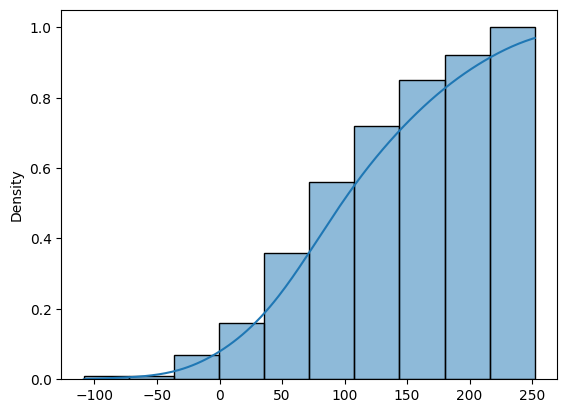

In [17]:
numbers = norm.rvs(107.807862, scale=68.880990, size=100)
sns.histplot(numbers, stat='density', cumulative=True, kde=True)

In [22]:
dist = getattr(scipy.stats, 'exponnorm') # defino mi modelo
param = dist.fit(df_target) # ajusto mi modelo a los datos
param

(0.9837586516813779, 58.47300571779385, 50.14935465243501)

<Axes: ylabel='Density'>

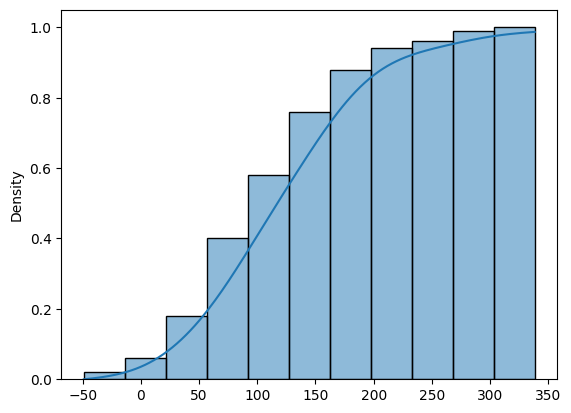

In [23]:
numbers = exponnorm.rvs(*param, size=100)
sns.histplot(numbers, stat='density', cumulative=True, kde=True)

In [24]:
beta.cdf(x=0.5, a=2, b=2)

0.5

In [ ]:
p_fallo =  1 - beta.cdf(x=0.5, a=2, b=2)
p_fallo * p_fallo

Probability of getting 125 or less: 61.07%


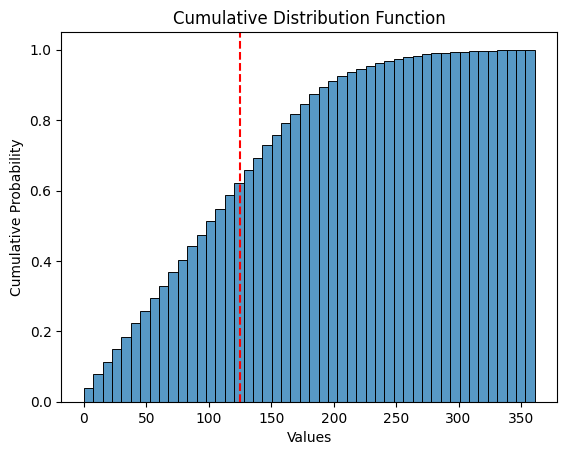

In [25]:
# Assuming df is your DataFrame and 'ttf' is the column of interest
sns.histplot(x=df['ttf'], stat='density', cumulative=True)
plt.axvline(x=125, color='red', linestyle='--')  # Highlight the value 125
plt.title('Cumulative Distribution Function')
plt.xlabel('Values')
plt.ylabel('Cumulative Probability')

# Calculate the probability of getting 125 or less
probability_125_or_less = df[df['ttf'] <= 125].shape[0] / df.shape[0]
print(f'Probability of getting 125 or less: {probability_125_or_less:.2%}')

plt.show()